[0.01038062283737029, 0.00692041522491349, 0.00692041522491349, 0.0034602076124568004, 0.0034602076124568004, 0.0034602076124568004, 0.00692041522491349, 0.0034602076124568004, 0.0034602076124568004, 0.01384083044982698]
[0.0034602076124568004, 0.03114186851211076, 0.0034602076124568004, 0.0034602076124568004, 0.0034602076124568004, 0.0034602076124568004, 0.01038062283737029, 0.02422145328719727, 0.00692041522491349, 0.00692041522491349]
[0.01038062283737029, 0.01384083044982698, 0.01038062283737029, 0.0034602076124568004, 0.03806228373702425, 0.01038062283737029, 0.04498269896193774, 0.0034602076124568004, 0.04844290657439443, 0.01038062283737029]
[0.06228373702422141, 0.00692041522491349, 0.03114186851211076, 0.2906574394463668, 0.02768166089965396, 0.02076124567474047, 0.06228373702422141, 0.0034602076124568004, 0.0034602076124568004, 0.01038062283737029]
[0.615916955017301, 0.08996539792387548, 0.03114186851211076, 0.6955017301038062, 0.5570934256055363, 0.12110726643598613, 0.6643

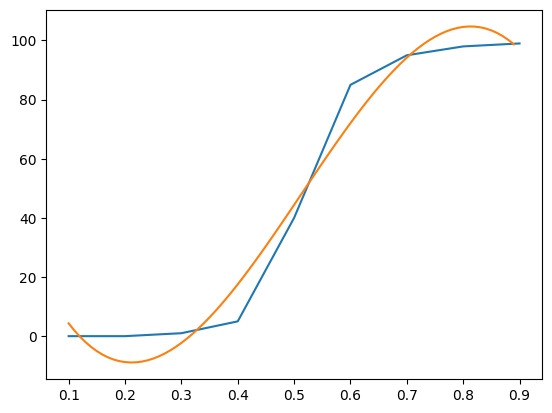

In [ ]:
#asumsi yang digunakan
# -) matriks ukuran 17 x 17
# -) pohon tidak tumbuh lagi dan tidak terkena petir
# -) hanya ada 1 pohon yang terbakar pada awalnya (tengah-tengah matriks)
# -) pohon yang terbakar saat t akan hangus pada t+1
# -) periodic boundary (sepertinya tidak butuh periodic but i'll do it anyway )
# -) tetangga dari sel adalah tetangga von Neumann
# -) 0 berarti lahan kosong
# -) 1 berarti terdapat pohon
# -) 2 berarti pohon yang terbakar
# -) simulasi berhenti setelah 100 iterasi

import numpy as np
import random as rn

# Inisialisasi matriks awal berukuran 17 x 17
hutan_asli = [[1 for i in range(17)] for j in range(17)]
hutan_asli[8][8] = 2 # pohon yang terbakar terletak di tengah matriks

# Inisialisasi matriks dengan batasan berukuran 19 x 19
hutan_terbatas =[[0 for i in range(19)] for j in range(19)]

def hutan_baru(hutan_terbatas) : # Membuat matriks hutan_terbatas lagi dari awal untuk keperluan iterasi
    # Memindahkan isi dari matriks 17 x 17 ke matriks 19 x 19
  for baris in range(1,18) :
    for kolom in range (1,18) :
      hutan_terbatas[baris][kolom] = hutan_asli[baris-1][kolom-1]
    # Membuat batas atas dan batas bawah
  hutan_terbatas[0] = hutan_terbatas[17]
  hutan_terbatas[18] = hutan_terbatas[1]
    # Membuat batas kiri dan batas kanan
  for baris in range(19) :
    hutan_terbatas[baris][0] = hutan_terbatas[baris][17]
    hutan_terbatas[baris][18] = hutan_terbatas[baris][1]

def pasang_batas_baru(matriks) : # mengotomatisasi pergantian batas dengan metode yang sama
  for kolom in range(1,18) :
    matriks[0][kolom] = matriks[17][kolom]
    matriks[18][kolom] = matriks[1][kolom]
  for baris in range(19) :
    matriks[baris][0] = matriks[baris][17]
    matriks[baris][18] = matriks[baris][1]

def persentase_selamat (matriks) : # Mengotomatisasi proses untuk mencari persentase pohon yang tidak terbakar
  pohon_total = 17*17 # dengan berasumsi bahwa pohon yang terbakar masih dihitung
  pohon_selamat = 0
  # bagian matriks yang dihitung jumlah pohonnya hanya matriks 17 x 17 yang ditengah
  for baris in range(1,18) :
    for kolom in range(1,18) :
      if matriks[baris][kolom] == 1 :
        pohon_selamat = pohon_selamat + 1
  persentase = pohon_selamat / pohon_total
  return persentase

def bakar_pohon_2(matriks,peluang) : # Mengotomatisasi proses membakar pohon dan menghilangkan pohon yang sudah habis terbakar
  hutan_awal = [['' for i in range(19)] for j in range(19)]
  # Menyimpan kondisi awal matriks
  for baris in range(19) :
    for kolom in range(19) :
      hutan_awal[baris][kolom] = matriks[baris][kolom]

  # Membakar pohon yang berdekatan dengan pohon yang sudah terbakar
  for baris in range(1,18) :
    for kolom in range(1,18) :
      if hutan_awal[baris][kolom] == 1 :
        if hutan_awal[baris+1][kolom] == 2 or hutan_awal[baris-1][kolom] == 2 or hutan_awal[baris][kolom+1] == 2 or hutan_awal[baris][kolom-1] == 2 :
          random = rn.random()
          if random < peluang :
            matriks[baris][kolom] = 2

  # Membakar habis pohon yang sudah terbakar sebelum iterasi
  for baris in range(1,18) :
    for kolom in range (1,18) :
      if hutan_awal[baris][kolom] == 2 :
        matriks[baris][kolom] = 0

# Membuat array yang menampung hasil simulasi (persentase pohon yang selamat)
hasil_simulasi = [[0 for percobaan in range(10)] for nilai_peluang in range(9)]

for peluang in range(1,10) : # peluang dari int dijadikan float karena python masih membaca 0.1 = 1/10
  for simulasi in range(10) : # simulasi ke-i
    hutan_baru(hutan_terbatas)
    for iterasi in range(100): # iterasi sebanyak 100 kali
      bakar_pohon_2(hutan_terbatas,(peluang/10)) #peluang dari int ke float atau index dari float ke int (?)
      pasang_batas_baru(hutan_terbatas)
    hasil_simulasi[peluang-1][simulasi] = 1- persentase_selamat(hutan_terbatas)

for baris in range(9) :
  print(hasil_simulasi[baris])

import matplotlib.pyplot as plt
import scipy.optimize as optimize

def f(x,a,b,c,d) :
  return a*(x**3) + b*(x**2) + c*x + d



absis = [(i+1)/10 for i in range(9)]
rata_rata = []

for peluang in range(9) :
  rata_rata.append(sum(hasil_simulasi[peluang])/len(hasil_simulasi[peluang])//0.01)

parameter, pcov = optimize.curve_fit(f,absis, rata_rata)
print("fungsi yang paling mendekati bentuk data adalah : ")
print('F(x) = ' + str(parameter[0]) + 'x^3 + ' + str(parameter[1]) + 'x^2 + ' + str(parameter[2]) + 'x + ' + str(parameter[3]) )

absis_2 = [0.1 + 0.01*i for i in range(80)]
rata_rata_fitting = [f(absis_2[i],parameter[0],parameter[1],parameter[2],parameter[3]) for i in range(80)]
plt.plot(absis,rata_rata)
plt.plot(absis_2,rata_rata_fitting)



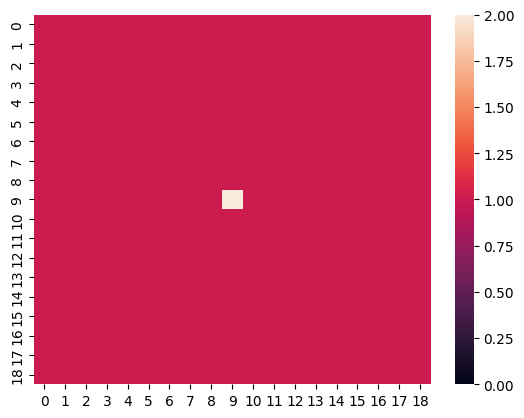

In [ ]:
import matplotlib.animation as animation
import seaborn as sns

fig = plt.figure()
ax = sns.heatmap(hutan_terbatas,vmin = 0, vmax = 2)

def init() :
  plt.clf()
  hutan_baru(hutan_terbatas)
  ax = sns.heatmap(hutan_terbatas, vmin = 0, vmax = 2)
  return None

def animate(i) :
  plt.clf()
  ax = sns.heatmap(hutan_terbatas, vmin = 0, vmax = 2)
  pasang_batas_baru(hutan_terbatas)
  bakar_pohon_2(hutan_terbatas,0.7)

  return None

anim = animation.FuncAnimation(fig,animate, frames = 100, blit = False, interval = 1000/30, init_func= init)

from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim